In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
 # Display the row's columns and data in dictionary format
first_row_m = session.query(measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc218455e20>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [12]:
first_row_s = session.query(station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fefc1506850>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [ ]:
# Perform a query to retrieve the data and precipitation scores
twelve_months = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date < '2017-08-23').filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

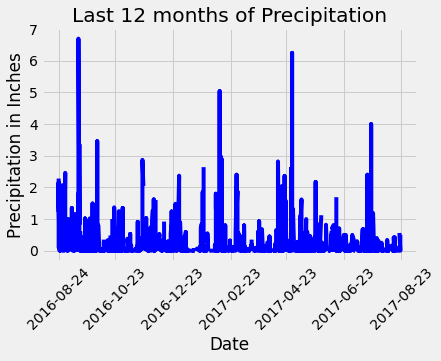

In [45]:
# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_df = pd.DataFrame(twelve_months, columns=['date', 'prcp'])
one_year_df.set_index('date', inplace=True)

# Sort the dataframe by date
sorted_df = one_year_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

x = sorted_df.index
y = sorted_df["prcp"]

plt.plot(x, y, color="blue")
plt.title("Last 12 months of Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.xticks(['2016-08-24','2016-10-23', '2016-12-23', '2017-02-23','2017-04-23','2017-06-23', '2017-08-23'],
       rotation=45) 
#show plot and save image
plt.savefig("data/last12moprcp.png")
plt.show()

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(measurement).group_by(measurement.station).count()
print(total_stations)

9


In [10]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel = [measurement.station, func.count(measurement.id)]
count = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc())

active_stations_df = pd.DataFrame(count, columns=['station', 'id'])
active_stations_df.set_index('station', inplace=True)
active_stations_df

,id
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

USC00519281_lowest = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').one()

USC00519281_highest = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').one()

USC00519281_avg = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').one()

print(f'The lowest temperature for Station USC00519281 is {USC00519281_lowest}.')
print(f'The highest temperature for Station USC00519281 is {USC00519281_highest}.')
print(f'The average temperature for Station USC00519281 is {USC00519281_avg}.')

The lowest temperature for Station USC00519281 is (54.0,).
The highest temperature for Station USC00519281 is (85.0,).
The average temperature for Station USC00519281 is (71.66378066378067,).


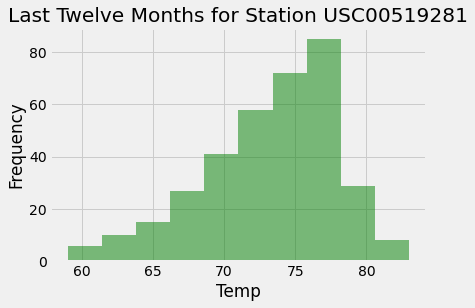

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

twelve_months_USC00519281 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date < '2017-08-23').filter(measurement.date > '2016-08-23').\
    filter(measurement.station == 'USC00519281').order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
USC00519281_df = pd.DataFrame(twelve_months_USC00519281, columns=['date', 'tobs'])
USC00519281_df.set_index('date', inplace=True)

# Sort the dataframe by date
sorted_df_2 = USC00519281_df.sort_values("date")

# plot the data

sorted_df_2.hist(column = "tobs", facecolor='g', alpha=0.5)
plt.title("Last Twelve Months for Station USC00519281")
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.grid(True)

#show plot and save image
plt.savefig("Data/temphist.png")
plt.show()


# Close session

In [51]:
# Close Session
session.close()